In [1]:
import pandas as pd
import numpy as np

In [2]:
def root_mean_square_error(y_pred, y_true):
    return np.sqrt(((y_pred - y_true) ** 2).mean())

In [3]:
def mean_absolute_percentage_error(y_pred,y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
def statis(obs,sim):
    mape=mean_absolute_percentage_error(sim,obs)
    rmse=root_mean_square_error(sim,obs)
    #for ik in range(7):
    R=np.corrcoef(obs,sim)[0, 1]
    return rmse,mape,R

In [5]:
df= pd.read_csv("pm_obsuse.csv")

In [6]:
df.head()

,BJC,STA,pm25_100,pm25_50,pm25_10,pm25_1,pm25,pm25_100use,pm25_50use
0,2017-06-09_07:00:00,Shanghai,62.48,33.06,9.37,4.22,78.0,62.48,33.06
1,2017-06-09_08:00:00,Shanghai,72.15,37.12,10.38,4.41,71.0,72.15,37.12
2,2017-06-09_09:00:00,Shanghai,83.52,42.09,11.37,3.85,73.0,83.52,42.09
3,2017-06-09_10:00:00,Shanghai,88.44,43.74,10.91,2.68,79.0,88.44,43.74
4,2017-06-09_11:00:00,Shanghai,79.88,39.21,9.27,1.55,75.0,79.88,39.21


In [7]:
df.dropna(inplace=True)
df.set_index(['STA'], inplace=True)

In [8]:
df.head()

,BJC,pm25_100,pm25_50,pm25_10,pm25_1,pm25,pm25_100use,pm25_50use
STA,,,,,,,,
Shanghai,2017-06-09_07:00:00,62.48,33.06,9.37,4.22,78.0,62.48,33.06
Shanghai,2017-06-09_08:00:00,72.15,37.12,10.38,4.41,71.0,72.15,37.12
Shanghai,2017-06-09_09:00:00,83.52,42.09,11.37,3.85,73.0,83.52,42.09
Shanghai,2017-06-09_10:00:00,88.44,43.74,10.91,2.68,79.0,88.44,43.74
Shanghai,2017-06-09_11:00:00,79.88,39.21,9.27,1.55,75.0,79.88,39.21


In [9]:
data=pd.DataFrame(columns=['STA','rmse_100', 'rmse_50', 'rmse_10','rmse_1','rmse_100use','rmse_50use','mape_100', 'mape_50', 'mape_10','mape_1','mape_100use','mape_50use','R_100', 'R_50', 'R_10','R_1','R_100use','R_50use'])

In [10]:
station= [
           u'Xuzhou',u'Huaiyin',u'Yancheng', u'Yangzhou',u'Taizhou',
           u'Nanjing', u'Zhenjiang', u'Changzhou',
           u'Shanghai',u'Wuxi',u'Nantong',u'Suzhou',
           ]

In [11]:
data["STA"]=station

In [12]:
data.set_index(['STA'], inplace=True)

In [13]:
data.head()

,rmse_100,rmse_50,rmse_10,rmse_1,rmse_100use,rmse_50use,mape_100,mape_50,mape_10,mape_1,mape_100use,mape_50use,R_100,R_50,R_10,R_1,R_100use,R_50use
STA,,,,,,,,,,,,,,,,,,
Xuzhou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Huaiyin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yancheng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yangzhou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taizhou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
for i in range(0,12):
    sta=station[i]
    data.loc[sta,'rmse_100'], data.loc[sta,'mape_100'],data.loc[sta,'R_100']= statis(np.array(df.loc[sta,'pm25_100']), np.array(df.loc[sta,'pm25']))
    data.loc[sta,'rmse_50'],data.loc[sta,'mape_50'],data.loc[sta,'R_50'] = statis(np.array(df.loc[sta,'pm25_50']), np.array(df.loc[sta,'pm25']))
    data.loc[sta,'rmse_10'],data.loc[sta,'mape_10'],data.loc[sta,'R_10'] = statis(np.array(df.loc[sta,'pm25_10']), np.array(df.loc[sta,'pm25']))
    data.loc[sta,'rmse_1'],data.loc[sta,'mape_1'],data.loc[sta,'R_1'] = statis(np.array(df.loc[sta,'pm25_1']), np.array(df.loc[sta,'pm25']))
    data.loc[sta,'rmse_100use'],data.loc[sta,'mape_100use'],data.loc[sta,'R_100use'] = statis(np.array(df.loc[sta,'pm25_100use']), np.array(df.loc[sta,'pm25']))
    data.loc[sta,'rmse_50use'],data.loc[sta,'mape_50use'],data.loc[sta,'R_50use'] = statis(np.array(df.loc[sta,'pm25_50use']), np.array(df.loc[sta,'pm25']))


In [29]:
data

,rmse_100,rmse_50,rmse_10,rmse_1,rmse_100use,rmse_50use,mape_100,mape_50,mape_10,mape_1,mape_100use,mape_50use,R_100,R_50,R_10,R_1,R_100use,R_50use
STA,,,,,,,,,,,,,,,,,,
Xuzhou,68.3861,74.5845,108.177,114.632,56.4857,78.5894,143.267,306.287,2324.81,11326.4,140.401,321.891,0.32393,0.339135,0.346915,0.358631,0.35727,0.364489
Huaiyin,63.1354,54.0088,84.7186,91.6618,41.6675,55.2841,149.949,303.111,1204.49,6209.86,159.045,328.573,0.368638,0.417118,0.430917,-0.194089,0.69616,0.654376
Yancheng,43.1693,52.4485,73.8945,77.525,40.0272,52.4485,348.969,418.609,1274.88,4461.79,346.96,418.609,0.679353,0.733524,0.544902,-0.331582,0.753842,0.733524
Yangzhou,53.2564,53.9137,61.7753,66.9857,36.3392,48.777,91.5077,197.437,1003.09,3892.05,85.1681,198.306,0.447769,0.0737011,0.307181,0.0652925,0.588722,0.255728
Taizhou,80.5135,59.4985,66.8274,72.3237,36.2852,47.5591,96.0441,181.037,900.131,3898.33,88.9866,180.879,0.201247,0.136416,0.17904,-0.160363,0.67255,0.574951
Nanjing,67.6583,35.4993,40.0128,44.7319,30.5777,27.3409,71.2808,82.0106,480.48,2689.07,59.9742,77.5543,0.258564,0.219337,0.304978,0.0454141,0.511488,0.513365
Zhenjiang,78.6501,54.437,64.1188,69.2437,41.5392,47.0123,72.0797,168.082,937.127,3758.03,68.3396,177.589,0.156054,0.118606,0.351602,0.116093,0.440728,0.492048
Changzhou,70.4196,30.8372,40.3277,46.6229,16.2197,22.8258,49.1775,79.4276,610.916,3549.9,29.5166,79.1048,0.413165,0.384082,0.427393,0.0644677,0.689691,0.528675
Shanghai,50.4356,28.5914,39.0493,43.9568,14.4223,25.9927,52.5681,111.903,548.295,2625.77,42.5142,110.452,0.483989,0.47853,0.5554,0.0102643,0.860047,0.664111


In [48]:
data.to_csv("statis.csv")

In [42]:
corr=data[columns==['R_100', 'R_50', 'R_10','R_1','R_100use','R_50use']]

KeyError: False

In [43]:
corr=data.loc[:,data.columns.isin({'R_100', 'R_50', 'R_10','R_1','R_100use','R_50use'})]

In [44]:
corr

,R_100,R_50,R_10,R_1,R_100use,R_50use
STA,,,,,,
Xuzhou,0.32393,0.339135,0.346915,0.358631,0.35727,0.364489
Huaiyin,0.368638,0.417118,0.430917,-0.194089,0.69616,0.654376
Yancheng,0.679353,0.733524,0.544902,-0.331582,0.753842,0.733524
Yangzhou,0.447769,0.0737011,0.307181,0.0652925,0.588722,0.255728
Taizhou,0.201247,0.136416,0.17904,-0.160363,0.67255,0.574951
Nanjing,0.258564,0.219337,0.304978,0.0454141,0.511488,0.513365
Zhenjiang,0.156054,0.118606,0.351602,0.116093,0.440728,0.492048
Changzhou,0.413165,0.384082,0.427393,0.0644677,0.689691,0.528675
Shanghai,0.483989,0.47853,0.5554,0.0102643,0.860047,0.664111


import matplotlib.pyplot as plt
%matplotlib inline
columns =('STA','rmse_100', 'rmse_50', 'rmse_10','rmse_1','rmse_100use','rmse_50use','mape_100', 'mape_50', 'mape_10','mape_1','mape_100use','mape_50use','R_100', 'R_50', 'R_10','R_1','R_100use','R_50use')
rows = [x for x in station]

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3


# Plot bars and create text labels for the table
cell_text = []
fig, ax = plt.subplots()
for row in range(n_rows):
    ax.scatter(, y, c=colors, s=scale,
               alpha=0.3, edgecolors='none')
    y_offset = y_offset + data[row]
    #cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()
ax.legend()
ax.grid(True)
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

[Is there a library function for Root mean square error (RMSE) in python?](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python/37861832#37861832)

https://matplotlib.org/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py

In [36]:
import seaborn as sns
sns.set()

In [ ]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="distance", y="orbital_period",
                     hue="year", size="mass",
                     palette=cmap, sizes=(10, 200),
                     data=planets)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

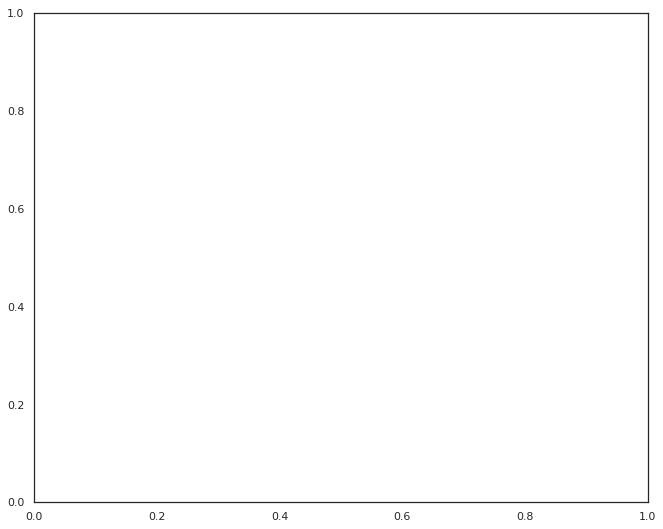

In [47]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white")

# Generate a large random dataset

# Compute the correlation matrix
#corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#sns.heatmap(corr, cmap=cmap)